# Proyección de rendimientos - Método Montecarlo
Sofía Hernández, Santiago Figueiras e Ilse Gutiérrez

# Planteamiento del Problema

Un despacho de consultores financieros ha seleccionado seis posibles empresas en las cuales invertir; sin embargo, sólo buscan invertir en aquellas cuya proyección a dos años tenga más del 50% de probabilidad de superar el 15% de rendimiento.

Las empresas seleccionadas son las siguientes:
- Coca-Cola
- Bimbo
- Gruma
- Twitter
- Alsea
- Aeroméxico

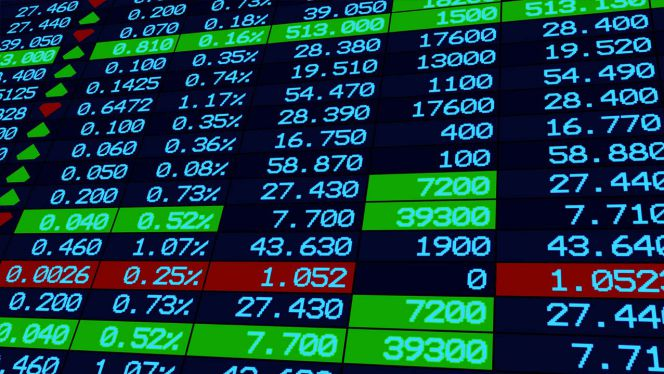

# Tabla de contenido

### General
- Seleccionar las empresas que cumplan con los requisitos del despacho de consultores. 

### Específico
- Conocer el rendimiento de las seis empresas seleccionados en los últimos cuatro años.
- Encontrar la media y desviación estándar de cada una de ellas.
- Simular diez mil escenarios a partir del primero de marzo del 2022 al primero de marzo del 2024. 
- Graficar las probabilidades de cumplir con el 15% de rendimiento.
- Analizar los resultados. 

# Modelo que representa

In [8]:
R.describe()

Symbols,COKE,BIMBOA.MX,GRUMAB.MX,TWTR,ALSEA.MX,AEROMEX.MX
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,0.001209,0.000531,0.000463,0.000877,0.000237,-0.001586
std,0.026242,0.020995,0.015911,0.032683,0.024272,0.048226
min,-0.234699,-0.117910,-0.075407,-0.211139,-0.227826,-0.523035
25%,-0.010747,-0.011139,-0.007477,-0.013876,-0.011714,-0.016137
50%,0.001107,0.000268,0.000205,0.001033,0.000000,-0.001901
75%,0.012958,0.010771,0.008137,0.015500,0.010095,0.010648
max,0.178584,0.140780,0.093033,0.156441,0.147125,0.568966


# Deducción del modelo
Una vez obtenidas la media y desviación estándar de las empresas seleccionadas, el programa procedió a simular 10,000 casos en una proyección de dos años a partir de la última fecha de la que tenemos información.

Posteriormente, le pedimos al programa que indicara aquellos casos simulados en los que el rendimiento de las acciones fuera mayor al 15%.

Finalmente, el programa calculó la probabilidad de que el rendimiento deseado se cumpliera.

# Significado y valor de parámetros
- COKE – Coca Cola
- BIMBOA.MX - BIMBO
- GRUMAB.MX - Gruma
- TWTR - Twitter
- ALSEA.MX - Alsea
- AEROMEX.MX - Aeroméxico

# Situación que representa
- Dadas las necesidades del cliente, le pedimos al programa que calculara la probabilidad de que estas empresas alcanzaran el 15% de rendimiento. 

- Posteriormente, seleccionamos aquellas que tuvieran más del 50% de probabilidad de alcanzar este rendimiento.

### Para la resolución del problema utilizamos el Método Montecarlo para simular los rendimientos de dos años, recopilando datos de Yahoo Finance desde abril del 2018 hasta abril del 2022 (4 años).

In [5]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names = ["COKE", "BIMBOA.MX", "GRUMAB.MX", "TWTR", "ALSEA.MX", "AEROMEX.MX"]
start = "2018-03-01"
end   = "2022-03-01"

def getClose(name, start, end) :
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

data = getClose(names, start, end)
data.head()

Symbols,COKE,BIMBOA.MX,GRUMAB.MX,TWTR,ALSEA.MX,AEROMEX.MX
Date,,,,,,
2018-03-01,182.549545,41.586456,200.129730,32.240002,63.262363,28.270000
2018-03-02,188.148697,40.605286,207.007782,33.000000,62.995392,28.209999
2018-03-05,183.031723,40.312824,204.648285,34.580002,63.381016,28.110001
2018-03-06,185.767349,40.076962,203.372910,34.430000,63.212925,28.000000
2018-03-07,182.352722,38.775028,204.520752,35.759998,63.282139,27.799999


### La siguiente gráfica muestra el historial del precio de las acciones desde el 2018

<AxesSubplot:xlabel='Date'>

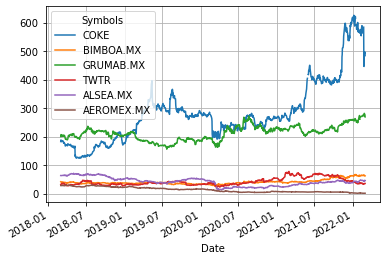

In [3]:
data.plot(grid=True)

### Obtenemos sus propiedades estadísticas muestrales

In [6]:
R = ((data - data.shift())/data.shift()).dropna()
R.describe()

Symbols,COKE,BIMBOA.MX,GRUMAB.MX,TWTR,ALSEA.MX,AEROMEX.MX
count,927.000000,927.000000,927.000000,927.000000,927.000000,927.000000
mean,0.001209,0.000531,0.000463,0.000877,0.000237,-0.001586
std,0.026242,0.020995,0.015911,0.032683,0.024272,0.048226
min,-0.234699,-0.117910,-0.075407,-0.211139,-0.227826,-0.523035
25%,-0.010747,-0.011139,-0.007477,-0.013876,-0.011714,-0.016137
50%,0.001107,0.000268,0.000205,0.001033,0.000000,-0.001901
75%,0.012958,0.010771,0.008137,0.015500,0.010095,0.010648
max,0.178584,0.140780,0.093033,0.156441,0.147125,0.568966


In [7]:
media_CO = R["COKE"].mean()
std_CO = R["COKE"].std()

media_BIM = R["BIMBOA.MX"].mean()
std_BIM = R["BIMBOA.MX"].std()

media_GRUMA = R["GRUMAB.MX"].mean()
std_GRUMA = R["GRUMAB.MX"].std()

media_TW = R["TWTR"].mean()
std_TW = R["TWTR"].std()

media_ALS = R["ALSEA.MX"].mean()
std_ALS = R["ALSEA.MX"].std()

media_AERO = R["AEROMEX.MX"].mean()
std_AERO = R["AEROMEX.MX"].std()

### Diseñamos el programa que simulará los rendimientos utilizando el Método Montecarlo

In [27]:
def simR(names, means, stds, start, dias, N) :
    sims = {}
    fechas = pd.date_range(start, periods = dias)
    for name, mean, std in zip(names, means, stds) :
        R_sim = np.random.normal(mean, std, size = (dias, N))
        sims[name] = pd.DataFrame(data=R_sim, index = fechas)
    return sims

names = ["COKE", "BIMBOA.MX", "GRUMAB.MX", "TWTR", "ALSEA.MX", "AEROMEX.MX"]
means = [media_CO, media_BIM, media_GRUMA, media_TW, media_ALS, media_AERO]
stds =  [std_CO,   std_BIM, std_GRUMA, std_TW, std_ALS, std_AERO]

sims = simR(names, means, stds, "2022-03-01", 730, 10000)

In [28]:
sims = simR(names, means, stds, "2022-03-01", 730, 10000)

sims["COKE"] = (sims["COKE"] + 1).cumprod()*data["COKE"].iloc[-1]
sims["BIMBOA.MX"] = (sims["BIMBOA.MX"] + 1).cumprod()*data["BIMBOA.MX"].iloc[-1]
sims["GRUMAB.MX"] = (sims["GRUMAB.MX"] + 1).cumprod()*data["GRUMAB.MX"].iloc[-1]
sims["TWTR"] = (sims["TWTR"] + 1).cumprod()*data["TWTR"].iloc[-1]
sims["ALSEA.MX"] = (sims["ALSEA.MX"] + 1).cumprod()*data["ALSEA.MX"].iloc[-1]
sims["AEROMEX.MX"] = (sims["AEROMEX.MX"] + 1).cumprod()*data["AEROMEX.MX"].iloc[-1]

In [29]:
valor_deseado_CO = data["COKE"].iloc[-1]*1.15
valor_deseado_BIM = data["BIMBOA.MX"].iloc[-1]*1.15
valor_deseado_GRUMA = data["GRUMAB.MX"].iloc[-1]*1.15
valor_deseado_TW = data["TWTR"].iloc[-1]*1.15
valor_deseado_ALS = data["ALSEA.MX"].iloc[-1]*1.15
valor_deseado_AERO = data["AEROMEX.MX"].iloc[-1]*1.15

B_CO = sims["COKE"] >= valor_deseado_CO
B_BIM = sims["BIMBOA.MX"] >= valor_deseado_BIM
B_GRUMA = sims["GRUMAB.MX"] >= valor_deseado_GRUMA
B_TW = sims["TWTR"] >= valor_deseado_TW
B_ALS = sims["ALSEA.MX"] >= valor_deseado_ALS
B_AERO = sims["AEROMEX.MX"] >= valor_deseado_AERO

In [30]:
P_CO = B_CO.mean(axis = 1)
P_CO.columns = ["COKE"]

P_BIM = B_BIM.mean(axis = 1)
P_BIM.columns = ["BIMBOA.MX"]

P_GRUMA = B_GRUMA.mean(axis = 1)
P_GRUMA.columns = ["GRUMAB.MX"]

P_TW = B_TW.mean(axis = 1)
P_TW.columns = ["TWTR"]

P_ALS = B_ALS.mean(axis = 1)
P_ALS.columns = ["ALSEA.MX"]

P_AERO = B_AERO.mean(axis = 1)
P_AERO.columns = ["AEROMEX.MX"]

data2 = pd.DataFrame(index=pd.date_range("2022-03-01", 730), columns=["COKE", "BIMBOA.MX", "GRUMAB.MX", "TWTR", "ALSEA.MX", "AEROMEX.MX"])

data2["COKE"] = P_CO
data2["BIMBOA.MX"] = P_BIM
data2["GRUMAB.MX"] = P_GRUMA
data2["TWTR"] = P_TW
data2["ALSEA.MX"] = P_ALS
data2["AEROMEX.MX"] = P_AERO

# Solución del problema

### La siguiente gráfica muestra los resultados de la probabilidad precio-umbral

<AxesSubplot:>

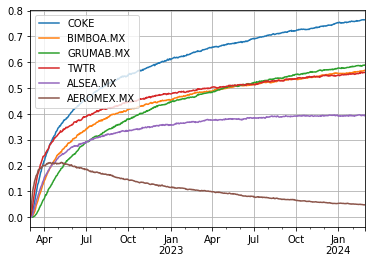

In [31]:
data2.plot(grid=True)

### Los datos de la gráfica en forma de tabla y con números exactos:

In [32]:
p_C = B_CO.mean(axis=1)
p_B = B_BIM.mean(axis=1)
p_G = B_GRUMA.mean(axis=1)
p_T = B_TW.mean(axis=1)
p_Al = B_ALS.mean(axis=1)
p_Am = B_AERO.mean(axis=1)

p_C, p_B, p_G, p_T, p_Al, p_Am

(2022-03-01    0.0000
 2022-03-02    0.0002
 2022-03-03    0.0012
 2022-03-04    0.0045
 2022-03-05    0.0087
                ...  
 2024-02-24    0.7644
 2024-02-25    0.7651
 2024-02-26    0.7642
 2024-02-27    0.7645
 2024-02-28    0.7647
 Freq: D, Length: 730, dtype: float64,
 2022-03-01    0.0000
 2022-03-02    0.0000
 2022-03-03    0.0000
 2022-03-04    0.0004
 2022-03-05    0.0012
                ...  
 2024-02-24    0.5671
 2024-02-25    0.5675
 2024-02-26    0.5677
 2024-02-27    0.5690
 2024-02-28    0.5688
 Freq: D, Length: 730, dtype: float64,
 2022-03-01    0.0000
 2022-03-02    0.0000
 2022-03-03    0.0000
 2022-03-04    0.0000
 2022-03-05    0.0000
                ...  
 2024-02-24    0.5892
 2024-02-25    0.5885
 2024-02-26    0.5883
 2024-02-27    0.5888
 2024-02-28    0.5899
 Freq: D, Length: 730, dtype: float64,
 2022-03-01    0.0000
 2022-03-02    0.0010
 2022-03-03    0.0068
 2022-03-04    0.0161
 2022-03-05    0.0290
                ...  
 2024-02-24    0.5607
 20

# Resultados obtenidos - Visualización de la solución del problema
### La siguiente gráfica representa la probabilidad de que cada empresa supere el 15% de rendimiento en un plazo de dos años:

|Empresa|Probabilidad|
|--------|-----------|
|Coca-Cola|76.65%|
|Bimbo|56.88%|
|Gruma|59.20%|
|Twitter|56.06%|
|Alsea|39.81%|
|Aeroméxico|4.98%|

### Según los requisitos del problema planteado, deberíamos descartar las siguientes empresas por no poder superar el 50% de probabilidad de conseguir nuestro objetivo planteado:
- Alsea
- Aeroméxico

### Por lo que solo nos quedaríamos con las siguientes 4 empresas para el portafolio:
- Coca-Cola
- Bimbo
- Gruma
- Twitter

# Conclusiones
- El Método Montecarlo permite resolver nuestro problema planteado porque los rendimientos diarios son procesos estocásticos (magnitudes aleatorias que varían con el tiempo), por lo que con una media de múltiples simulaciones aleatorias podemos obtener predicciones con una buena fiabilidad para tomar decisiones.
- La solución del modelo cumple con las restricciones y características delimitamos en el planteamiento y código.

# Referencias
- Yahoo! (s. f.). Yahoo Finance. Yahoo Finance. Recuperado 24 de abril de 2022, de https://finance.yahoo.com